Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [256]:
import pandas as pd
import numpy as np
from functools import reduce

citybikesdf = pd.read_csv('city_bikes_data.csv')
fsqdf= pd.read_csv('fsq_data.csv')
yelpdf= pd.read_csv('yelp_data.csv')


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [264]:
final_df = pd.merge(fsqdf, yelpdf, on=['Name'], how='inner')
final_df = pd.merge(final_df, citybikesdf, on=['Name'], how='outer')
final_df



,Unnamed: 0_x,FSQ_ID,Status,Distance_x,Name,Latitude_x,Longitude_x,Address_x,Unnamed: 0_y,ID_x,...,Longitude_y,location.zip_code,Address_y,Unnamed: 0,empty_slots,free_bikes,ID_y,Latitude,Longitude,Address
0,480.0,513191d3e4b0ef4e0b628a67,VeryLikelyOpen,421.0,AFRU Gallery,45.519771,-122.660155,"534 SE Oak St, Portland, OR 97214",49.0,igjJ8A4JbiTCI7KYJsvXdQ,...,-122.660122,97214.0,"['534 SE Oak', 'Portland, OR 97214']",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,420.0,514395b0183f1ae45512f642,LikelyOpen,604.0,Adams and Ollman,45.523125,-122.657366,"811 E Burnside St, Portland, OR 97214",15.0,IutKQSo6ZrmLlbtWoknrDg,...,-122.680131,97205.0,"['209 SW 9th Ave', 'Portland, OR 97205']",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1126.0,5bcfcebd061b51002c1a5079,Unsure,943.0,Alberta Street Gallery,45.558934,-122.637329,"2724 NE Alberta St (19th Avenue), Portland, OR...",465.0,1ZSyggKCcQFBv0chFGw42w,...,-122.646129,97211.0,"['1829 NE Alberta St', 'Unit B', 'Portland, OR...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,718.0,871a946fbd3c4aeef7de3e93,Unsure,939.0,Antler Gallery,45.558874,-122.637324,"2728 NE Alberta St, Portland, OR 97211",467.0,EYu5xK1ru8b0PX06WjVEGg,...,-122.647271,97211.0,"['2728 NE Alberta St', 'Portland, OR 97211']",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,279.0,28eee729f4d742d9fe5e33c3,VeryLikelyOpen,522.0,Artistic Portland Gallery,45.548092,-122.620379,"4110 NE Fremont St, Portland, OR 97212",2.0,dTtxMiXvHn6xtewMJlV7Uw,...,-122.620370,97204.0,"['4110 NE Fremont St', 'Portland, OR 97204']",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,NaN,NaN,NaN,NaN,SE Alder at 6th,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,233.0,10.0,0.0,71d1631fc898a831f4244409608e9493,45.517899,-122.660052,"East Portland Grand Avenue Historic District, ..."
274,NaN,NaN,NaN,NaN,SE 8th at Alder,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,234.0,1.0,4.0,87e039f7e0de4fb684c6405bc9b14f5f,45.518103,-122.657650,"737 SE Alder St, Portland, OR 97214, United St..."
275,NaN,NaN,NaN,NaN,Cleveland High School,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,235.0,8.0,1.0,013f3d702a2aa7c3898a54be63c5a021,45.498947,-122.637669,"2804 SE Franklin St, Portland, OR 97202, Unite..."
276,NaN,NaN,NaN,NaN,NE 37th at NE Shaver,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,236.0,4.0,2.0,544d22c8674963f49f89c45c532adc67,45.552358,-122.625588,"4030 NE 37th Ave, Portland, OR 97211, United S..."


In [265]:

final_df['Address'] = (final_df['Address_x'].fillna(0) + final_df['Address_y'].fillna(0))

final_df['Latitude'] = (final_df['Latitude_x'].fillna(0) + final_df['Latitude_y'].fillna(0)).round(2)

final_df['Longitude'] = (final_df['Longitude_x'].fillna(0) + final_df['Longitude_y'].fillna(0)).round(2)

final_df['Distance'] = np.where(final_df['Distance_x'].notnull(), final_df['Distance_x'], final_df['Distance_y'])

final_df = final_df.drop(['Latitude_x', 'Latitude_y', 'Longitude_x', 'Longitude_y', 'Distance_x', 'Distance_y'], axis=1)

final_df

,Unnamed: 0_x,FSQ_ID,Status,Name,Address_x,Unnamed: 0_y,ID_x,StatusClosed,ReviewCount,Rating,location.zip_code,Address_y,Unnamed: 0,empty_slots,free_bikes,ID_y,Latitude,Longitude,Address,Distance
0,480.0,513191d3e4b0ef4e0b628a67,VeryLikelyOpen,AFRU Gallery,"534 SE Oak St, Portland, OR 97214",49.0,igjJ8A4JbiTCI7KYJsvXdQ,False,3.0,4.5,97214.0,"['534 SE Oak', 'Portland, OR 97214']",NaN,NaN,NaN,NaN,91.04,-245.32,"534 SE Oak St, Portland, OR 97214['534 SE Oak'...",421.0
1,420.0,514395b0183f1ae45512f642,LikelyOpen,Adams and Ollman,"811 E Burnside St, Portland, OR 97214",15.0,IutKQSo6ZrmLlbtWoknrDg,False,1.0,5.0,97205.0,"['209 SW 9th Ave', 'Portland, OR 97205']",NaN,NaN,NaN,NaN,91.05,-245.34,"811 E Burnside St, Portland, OR 97214['209 SW ...",604.0
2,1126.0,5bcfcebd061b51002c1a5079,Unsure,Alberta Street Gallery,"2724 NE Alberta St (19th Avenue), Portland, OR...",465.0,1ZSyggKCcQFBv0chFGw42w,False,13.0,5.0,97211.0,"['1829 NE Alberta St', 'Unit B', 'Portland, OR...",NaN,NaN,NaN,NaN,91.12,-245.28,"2724 NE Alberta St (19th Avenue), Portland, OR...",943.0
3,718.0,871a946fbd3c4aeef7de3e93,Unsure,Antler Gallery,"2728 NE Alberta St, Portland, OR 97211",467.0,EYu5xK1ru8b0PX06WjVEGg,False,7.0,4.5,97211.0,"['2728 NE Alberta St', 'Portland, OR 97211']",NaN,NaN,NaN,NaN,91.12,-245.28,"2728 NE Alberta St, Portland, OR 97211['2728 N...",939.0
4,279.0,28eee729f4d742d9fe5e33c3,VeryLikelyOpen,Artistic Portland Gallery,"4110 NE Fremont St, Portland, OR 97212",2.0,dTtxMiXvHn6xtewMJlV7Uw,False,18.0,5.0,97204.0,"['4110 NE Fremont St', 'Portland, OR 97204']",NaN,NaN,NaN,NaN,91.10,-245.24,"4110 NE Fremont St, Portland, OR 97212['4110 N...",522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,NaN,NaN,NaN,SE Alder at 6th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,10.0,0.0,71d1631fc898a831f4244409608e9493,0.00,0.00,0,NaN
274,NaN,NaN,NaN,SE 8th at Alder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.0,1.0,4.0,87e039f7e0de4fb684c6405bc9b14f5f,0.00,0.00,0,NaN
275,NaN,NaN,NaN,Cleveland High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.0,8.0,1.0,013f3d702a2aa7c3898a54be63c5a021,0.00,0.00,0,NaN
276,NaN,NaN,NaN,NE 37th at NE Shaver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.0,4.0,2.0,544d22c8674963f49f89c45c532adc67,0.00,0.00,0,NaN


In [276]:
ff_df = final_df.drop(['Unnamed: 0_x', 'FSQ_ID', 'Unnamed: 0_y', 'ID_x', 'ID_y', 'Unnamed: 0', 'Address', 'Status', 'StatusClosed', 'Address_x', 'Address_y'],axis=1)

ff_df



,Name,ReviewCount,Rating,location.zip_code,empty_slots,free_bikes,Latitude,Longitude,Distance
0,AFRU Gallery,3.0,4.5,97214.0,NaN,NaN,91.04,-245.32,421.0
1,Adams and Ollman,1.0,5.0,97205.0,NaN,NaN,91.05,-245.34,604.0
2,Alberta Street Gallery,13.0,5.0,97211.0,NaN,NaN,91.12,-245.28,943.0
3,Antler Gallery,7.0,4.5,97211.0,NaN,NaN,91.12,-245.28,939.0
4,Artistic Portland Gallery,18.0,5.0,97204.0,NaN,NaN,91.10,-245.24,522.0
...,...,...,...,...,...,...,...,...,...
273,SE Alder at 6th,NaN,NaN,NaN,10.0,0.0,0.00,0.00,NaN
274,SE 8th at Alder,NaN,NaN,NaN,1.0,4.0,0.00,0.00,NaN
275,Cleveland High School,NaN,NaN,NaN,8.0,1.0,0.00,0.00,NaN
276,NE 37th at NE Shaver,NaN,NaN,NaN,4.0,2.0,0.00,0.00,NaN


In [277]:
ff_df.to_csv('finalfinal_df.csv')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.

c:\Users\user\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

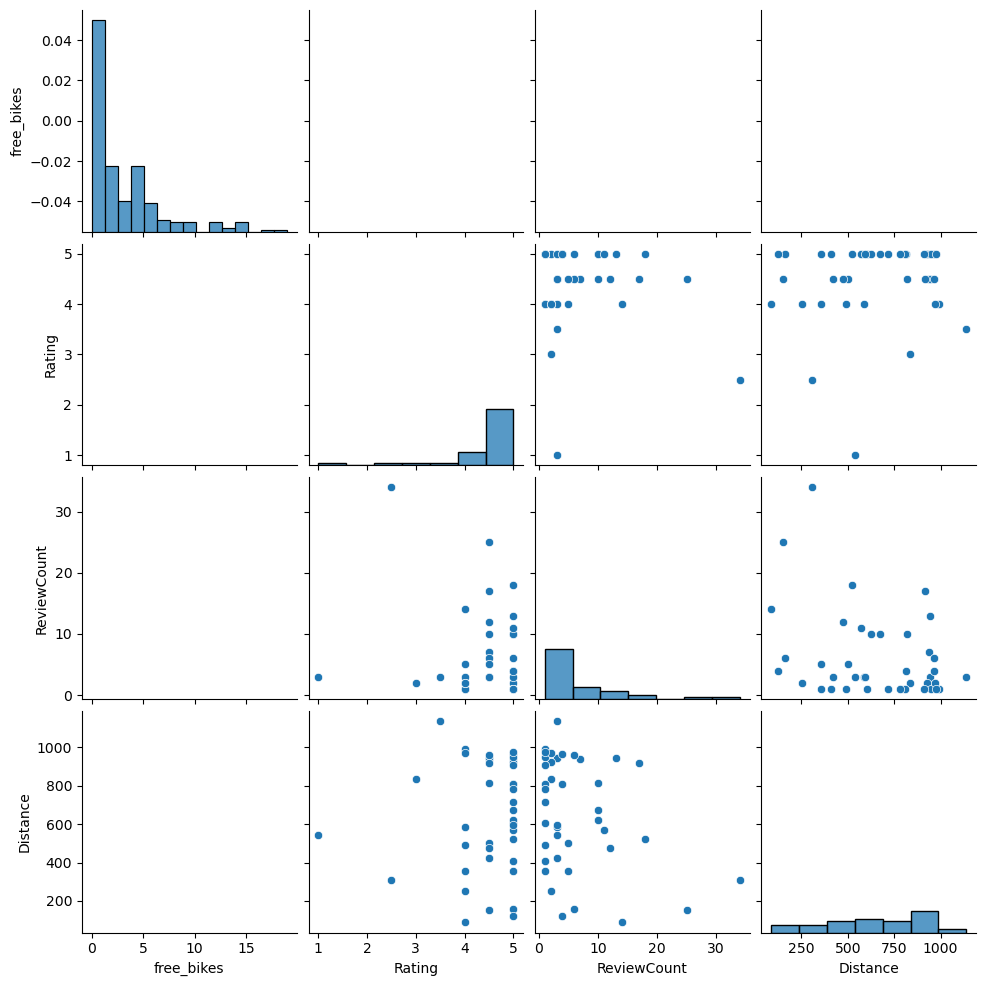

In [273]:
#EDA

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.pairplot(final_df[['free_bikes', 'Rating', 'ReviewCount', 'Distance']])

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [268]:
import sqlite3
from sqlite3 import Error
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection


In [272]:

data = sqlite3.connect('project_database.db')

# unsure between replace and append
citybikesdf.to_sql('citybikes_df', data, if_exists='replace', index=False)
fsqdf.to_sql('fsqrdf', data, if_exists='replace', index=False)
yelpdf.to_sql('yelpdf', data, if_exists='replace', index=False)
ff_df.to_sql('final_merge', data, if_exists='replace', index=False)

data.close()